# Read GIS data

In [2]:
import os
import pandas as pd
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [5]:
import fiona

In [149]:
PATH = "data/GIS"
gdb_path = os.path.join(PATH, "GISOutput/Output/Outputs.gdb")

In [174]:
gdb = fiona.open(gdb_path)

In [189]:
gdb.schema

{'properties': {'admin_leve': 'str:80',
  'boundary': 'str:80',
  'name': 'str:80',
  'place': 'str:80',
  'population': 'str:80',
  'z_order': 'int',
  'way_area': 'float',
  'Shape_Length': 'float',
  'Shape_Area': 'float'},
 'geometry': 'MultiPolygon'}

In [191]:
gdb.schema['properties'].keys()

dict_keys(['admin_leve', 'boundary', 'name', 'place', 'population', 'z_order', 'way_area', 'Shape_Length', 'Shape_Area'])

In [181]:
for feature in gdb:
    print(feature)

In [182]:
gdb.bounds

(-90.56742900034806, 30.13899059943668, -89.49497300020374, 31.004899499512362)

In [205]:
for f in fiona.open(gdb_path, layer="DEMclip"):
    print(f.__dict__)

{'_delegate': <fiona.model._Feature object at 0x7fd264af2d90>, '_data': OrderedDict()}


In [150]:
print("Layers:")
print(*fiona.listlayers(gdb_path), sep='\n')

Layers:
countypoly
streams
SoilProperties
Aspectclip
DEMclip
EucDist_stre1_Clip_1
FlowAcc_DEMc1
Sloptiffclip
Streamdensity
VAT_conthr_raste
conthr_raste
curvclip
fras_aux_Aspectclip
fras_aux_DEMclip
fras_aux_EucDist_stre1_Clip_1
fras_aux_FlowAcc_DEMc1
fras_aux_Sloptiffclip
fras_aux_Streamdensity
fras_aux_conthr_raste
fras_aux_curvclip
fras_blk_Aspectclip
fras_blk_DEMclip
fras_blk_EucDist_stre1_Clip_1
fras_blk_FlowAcc_DEMc1
fras_blk_Sloptiffclip
fras_blk_Streamdensity
fras_blk_conthr_raste
fras_blk_curvclip
fras_bnd_Aspectclip
fras_bnd_DEMclip
fras_bnd_EucDist_stre1_Clip_1
fras_bnd_FlowAcc_DEMc1
fras_bnd_Sloptiffclip
fras_bnd_Streamdensity
fras_bnd_conthr_raste
fras_bnd_curvclip
fras_ras_Aspectclip
fras_ras_DEMclip
fras_ras_EucDist_stre1_Clip_1
fras_ras_FlowAcc_DEMc1
fras_ras_Sloptiffclip
fras_ras_Streamdensity
fras_ras_conthr_raste
fras_ras_curvclip


In [162]:
min_lat = 30.1
max_lat = 31.1
min_long = -90.6
max_long = -89.5
ax_box = [min_long, min_lat, max_long, max_lat]

In [163]:
gdf = gpd.read_file(gdb_path)
gdf

,admin_leve,boundary,name,place,population,z_order,way_area,Shape_Length,Shape_Area,geometry
0,6,administrative,Tangipahoa Parish,,128755,0,2.906170e+09,2.126686,0.201791,"MULTIPOLYGON (((-90.56743 30.63135, -90.56720 ..."
1,6,administrative,Washington Parish,,46371,0,2.387990e+09,2.171548,0.165433,"MULTIPOLYGON (((-90.34736 31.00051, -90.34601 ..."
2,6,administrative,St. Tammany Parish,,250088,0,3.926690e+09,2.879554,0.273293,"MULTIPOLYGON (((-90.25668 30.70235, -90.25557 ..."
3,,,,,,0,0.000000e+00,0.000000,0.000000,MULTIPOLYGON EMPTY


## streams

In [164]:
streams_gdf = gpd.read_file(gdb_path, layer='streams')
streams_gdf = streams_gdf[["geometry"]] #, "Name", "Region", "Miles", "Shape__Len", "Shape_Length"]]
streams_gdf

,geometry
0,"MULTILINESTRING ((-89.60508 30.14285, -89.5892..."
1,"MULTILINESTRING ((-90.02278 30.55253, -90.0234..."
2,"MULTILINESTRING ((-90.29479 30.62394, -90.2919..."
3,"MULTILINESTRING ((-90.06818 31.00020, -90.0716..."
4,"MULTILINESTRING ((-90.15237 30.74009, -90.1521..."
...,...
98,"MULTILINESTRING ((-89.82911 30.77632, -89.8285..."
99,"MULTILINESTRING ((-89.83343 30.76572, -89.8329..."
100,"MULTILINESTRING ((-90.19457 31.00084, -90.1945..."
101,"MULTILINESTRING ((-90.45467 30.99992, -90.4552..."


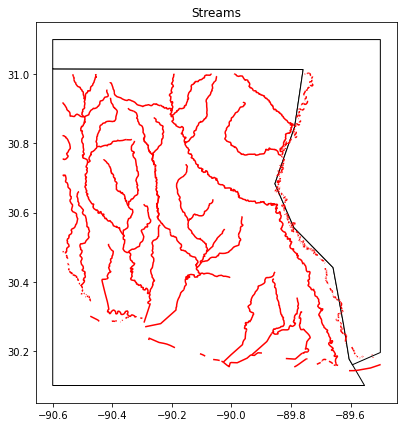

In [165]:
world = gpd.read_file('data/ne_110m_admin_1_states_provinces')
ax = world.clip(ax_box).plot(color="white", edgecolor="black",figsize=(10, 7))
streams_gdf.plot(ax=ax, marker='o', color='red', markersize=15)
plt.title("Streams")
plt.show()

## Flood events datapoints

In [166]:
mar_df = pd.read_csv("data/preprocessed/flood_coords-mar2016.csv")
aug_df = pd.read_csv("data/preprocessed/flood_coords-aug2016.csv")
flood_df = pd.concat([mar_df, aug_df])
del mar_df, aug_df 

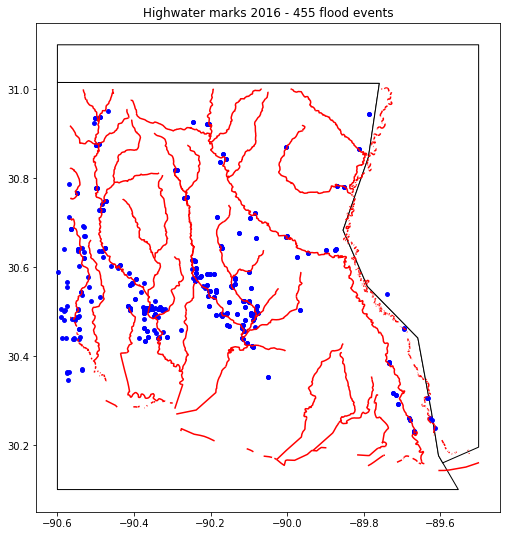

In [167]:
geometry = gpd.points_from_xy(flood_df['longitude'], flood_df['latitude'])
flood_gdf = GeoDataFrame(flood_df, geometry=geometry)   

# Use spatial indexing to filter the GeoDataFrame to the specified bounding box
flood_gdf = flood_gdf.cx[min_long:max_long, min_lat:max_lat]
gdf = gdf.cx[min_long:max_long, min_lat:max_lat]

ax = world.clip(ax_box).plot(color="white", edgecolor="black", figsize=(15, 9))
flood_gdf.plot(ax=ax, marker='o', color='blue', markersize=15)
streams_gdf.plot(ax=ax, marker='o', color='red', markersize=15)
plt.title(f"Highwater marks 2016 - {len(flood_gdf)} flood events")
plt.show()

## DEM

In [213]:
import rasterio
from rasterio.enums import Resampling

In [214]:
tiff_filename = "DEMclip.tif"
tiff_file_path = f"{gdb_path}/{tiff_filename}"

with rasterio.open(tiff_file_path) as src:
    dem_data = src.read(1)

# Print the list of raster layers
for idx, layer in enumerate(layers, 1):
    print(f"Layer {idx}: {layer}")


RasterioIOError: data/GIS/GISOutput/Output/Outputs.gdb/DEMclip.tif: No such file or directory

In [170]:
dem_gdf = gpd.read_file(gdb_path, layer='DEMclip')
dem_gdf

,RASTER,FOOTPRINT_Length,FOOTPRINT_Area,geometry
0,1,3.876729,0.928649,"MULTIPOLYGON (((-90.56742 30.13899, -90.56742 ..."


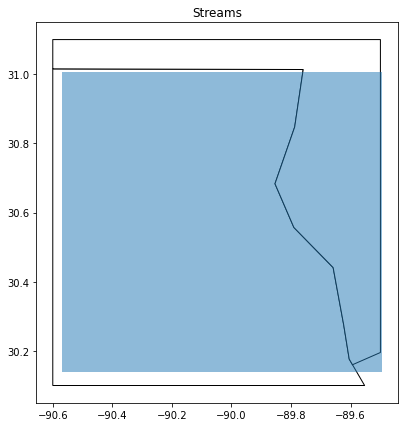

In [171]:
ax = world.clip(ax_box).plot(color="white", edgecolor="black",figsize=(10, 7))
dem_gdf.plot(ax=ax, alpha=0.5) #, marker='o', color='red', markersize=15)
plt.title("Streams")
plt.show()

## Aspect

In [220]:
aspect_gdf = gpd.read_file(gdb_path, layer='Aspectclip')
aspect_gdf

,RASTER,FOOTPRINT_Length,FOOTPRINT_Area,geometry
0,1,3.876729,0.928649,"MULTIPOLYGON (((-90.56742 30.13899, -90.56742 ..."


In [115]:
aspect_gdf['geometry']

0    MULTIPOLYGON (((-90.56742 30.13899, -90.56742 ...
Name: geometry, dtype: geometry

## Soil properties

In [229]:
soil_gdf = gpd.read_file(gdb_path, layer='SoilProperties')
soil_gdf

,GENERALIZE,unitdesc,rocktype1,rocktype2,rocktype3,low_lith,Shape_Length,Shape_Area,geometry
0,"Unconsolidated, undifferentiated","brown lignitic clays, silts and sands; some si...",clay or mud,silt,sand,Silt,0.080813,0.000329,"MULTIPOLYGON (((-92.31384 31.83678, -92.31680 ..."
1,"Unconsolidated, undifferentiated","brown lignitic clays, silts and sands; some si...",clay or mud,silt,sand,Silt,0.151724,0.000686,"MULTIPOLYGON (((-92.84011 32.61021, -92.83642 ..."
2,"Unconsolidated, undifferentiated","brown lignitic clays, silts and sands; some si...",clay or mud,silt,sand,Silt,0.023326,0.000032,"MULTIPOLYGON (((-93.37202 31.50323, -93.37325 ..."
3,"Unconsolidated, undifferentiated","brown lignitic clays, silts and sands; some si...",clay or mud,silt,sand,Silt,0.114026,0.000434,"MULTIPOLYGON (((-92.93959 32.71223, -92.94240 ..."
4,"Unconsolidated, undifferentiated","brown lignitic clays, silts and sands; some si...",clay or mud,silt,sand,Silt,0.034521,0.000070,"MULTIPOLYGON (((-92.85481 32.64242, -92.85761 ..."
...,...,...,...,...,...,...,...,...,...
4377,Water,NaN,water,NaN,NaN,Water,0.145780,0.000202,"MULTIPOLYGON (((-89.72203 29.75094, -89.72134 ..."
4378,Water,NaN,water,NaN,NaN,Water,0.277411,0.000825,"MULTIPOLYGON (((-89.19408 29.28412, -89.19318 ..."
4379,Water,NaN,water,NaN,NaN,Water,0.019538,0.000020,"MULTIPOLYGON (((-91.20503 29.25023, -91.20864 ..."
4380,Water,NaN,water,NaN,NaN,Water,0.017755,0.000018,"MULTIPOLYGON (((-91.42486 30.76814, -91.42652 ..."


In [243]:
soil_gdf['unitdesc'].unique()

array(['gray to brownish gray clay and silty clay, reddish brown in the Red River Valley, some sand and gravel locally. ',
       'gray to black clay of very high organic content, some peat. ',
       'gray and brown silt, silty clay, some very fine sand, reddish brown along the Red River. ',
       'gray mixed with brown-to-red clay and silty clay; some sand and gravel locally.',
       'tan to orange clay, silt, and sand with a large amount of basal gravels.',
       'light gray to orange-brown clay, sandy clay, and silt; much sand and gravel locally.',
       'light gray to light brown clay, sandy clay, silt, sand, and some gravels.',
       nan], dtype=object)

In [247]:
unit_desc

['gray to brownish gray clay and silty clay, reddish brown in the Red River Valley, some sand and gravel locally. ',
 'gray to black clay of very high organic content, some peat. ',
 'gray and brown silt, silty clay, some very fine sand, reddish brown along the Red River. ',
 'gray mixed with brown-to-red clay and silty clay; some sand and gravel locally.',
 'tan to orange clay, silt, and sand with a large amount of basal gravels.',
 'light gray to orange-brown clay, sandy clay, and silt; much sand and gravel locally.',
 'light gray to light brown clay, sandy clay, silt, sand, and some gravels.',
 nan]

In [253]:
unit_desc = list(soil_gdf['unitdesc'].unique())

dico_desc = dict(zip(unit_desc, [str(i) for i in range(len(unit_desc))]))
dico_desc

{'gray to brownish gray clay and silty clay, reddish brown in the Red River Valley, some sand and gravel locally. ': '0',
 'gray to black clay of very high organic content, some peat. ': '1',
 'gray and brown silt, silty clay, some very fine sand, reddish brown along the Red River. ': '2',
 'gray mixed with brown-to-red clay and silty clay; some sand and gravel locally.': '3',
 'tan to orange clay, silt, and sand with a large amount of basal gravels.': '4',
 'light gray to orange-brown clay, sandy clay, and silt; much sand and gravel locally.': '5',
 'light gray to light brown clay, sandy clay, silt, sand, and some gravels.': '6',
 nan: '7'}

In [254]:
soil_gdf['desc_idx'] = soil_gdf['unitdesc'].apply(lambda x:dico_desc[x])

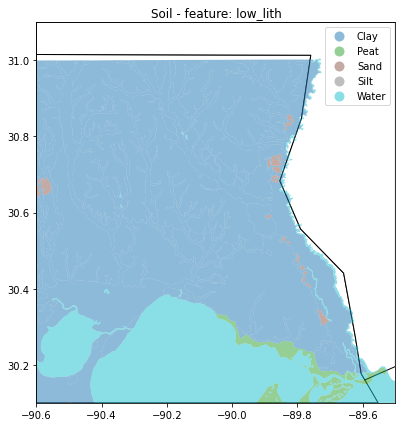

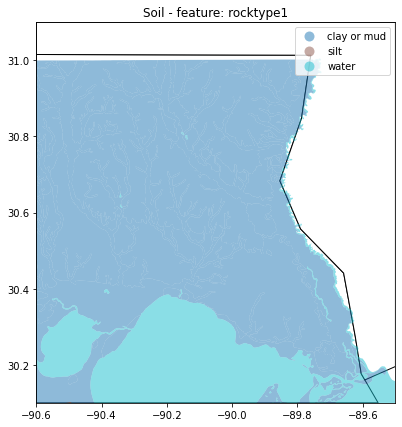

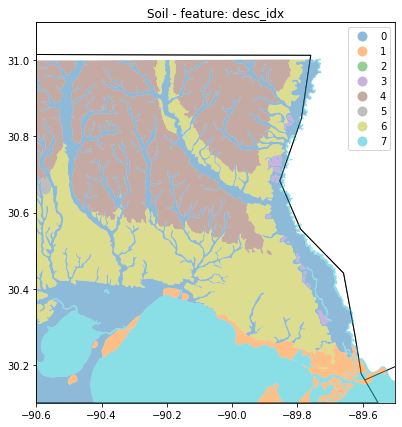

In [255]:
soil_gdf = soil_gdf.cx[min_long:max_long, min_lat:max_lat]

for soil_feature in ['low_lith',
                     'rocktype1',
                     'desc_idx']:
    ax = world.clip(ax_box).plot(color="white", edgecolor="black",figsize=(10, 7))
    ax.set_xlim(min_long, max_long)
    ax.set_ylim(min_lat, max_lat)
    soil_gdf.plot(ax=ax, alpha=0.5, column=soil_feature, legend=True)
    plt.title(f"Soil - feature: {soil_feature}")
    #plt.legend()
    plt.show()

In [225]:
soil_gdf.groupby('low_lith').count()

,GENERALIZE,unitdesc,rocktype2,rocktype3,low_lith,Shape_Length,Shape_Area,geometry
rocktype1,,,,,,,,
clay or mud,2971,2971,2971,2202,2971,2971,2971,2971
limestone,4,4,4,0,4,4,4,4
mudstone,11,11,11,11,11,11,11,11
sand,85,85,85,85,85,85,85,85
sandstone,103,103,103,103,103,103,103,103
shale,8,8,0,0,8,8,8,8
silt,83,83,83,83,83,83,83,83
siltstone,24,24,24,24,24,24,24,24
water,1093,0,0,0,1093,1093,1093,1093


In [224]:
soil_gdf.groupby('low_lith').count()

,GENERALIZE,unitdesc,rocktype1,rocktype2,rocktype3,Shape_Length,Shape_Area,geometry
low_lith,,,,,,,,
Black-shale,8,8,8,0,0,8,8,8
Clay,2068,2068,2068,2068,1885,2068,2068,2068
Limestone,4,4,4,4,0,4,4,4
Marl,91,91,91,91,0,91,91,91
Peat,479,479,479,479,0,479,479,479
Sand,381,381,381,381,381,381,381,381
Sandstone,61,61,61,61,61,61,61,61
Silt,147,147,147,147,131,147,147,147
Siltstone,24,24,24,24,24,24,24,24


## GDAL

In [207]:
import gdal

ModuleNotFoundError: No module named 'gdal'

In [218]:
import rasterio
from rasterio.features import rasterize
from rasterio.transform import IDENTITY

geometry = {'type':'Polygon','coordinates':[[(2,2),(2,4.25),(4.25,4.25),(4.25,2),(2,2)]]}
    
with rasterio.drivers():
    result = rasterize([geometry], out_shape=(rows, cols))
    with rasterio.open(
            "test.tif",
            'w',
            driver='GTiff',
            width=cols,
            height=rows,
            count=1,
            dtype=numpy.uint8,
            nodata=0,
            transform=IDENTITY,
            crs={'init': "EPSG:4326"}) as out:
                 out.write_band(1, result.astype(numpy.uint8))

TypeError: 'module' object is not callable